# Unitary test for mapping heritage between AnalyticMapping and SplineMapping

In [21]:
from abstract_mapping import AbstractMapping

def unitary_test_Mapping_heritage_values(mapping):
    assert(isinstance(mapping,AbstractMapping))
    (eta1, eta2) = (0.5, 0.1)
    print("__call__ : ", mapping(eta1,eta2), "\njacobian_eval : ", mapping.jacobian_eval(eta1,eta2), "\njacobian_inv_eval : ",mapping.jacobian_inv_eval(eta1,eta2),"\nmetric : ", mapping.metric_eval(eta1,eta2),"\nmetric_det : ",mapping.metric_det_eval(eta1,eta2))

# Test for plotting mapped domain on AbstractMapping and that heritage follows 

In [22]:
from utils import plot_domain
from sympde.topology.domain import Square
import numpy as np

def test_plot_domain_Mapping_heritage(mapping):
    assert(isinstance(mapping,AbstractMapping))
    # Creating the domain
    bounds1=(0., 1.)
    bounds2=(0., 2*np.pi)
    logical_domain = Square('A_1', bounds1, bounds2)
    omega = mapping(logical_domain)
    plot_domain(omega,draw=True,isolines=True)

Creating an analytical mappping polar mapping: 

In [23]:
from analytical_mappings import PolarMapping
analytical_polar_mapping = PolarMapping('F_1', dim=2, c1=0., c2=0., rmin=0.3, rmax=1.)

Creating the corresponding spline mapping :

In [24]:

import numpy as np 
from discrete import SplineMapping
from psydac.fem.splines      import SplineSpace
from psydac.fem.tensor       import TensorFemSpace
from psydac.ddm.cart         import DomainDecomposition
from mpi4py import MPI

# Defining parameters 
bounds1=(0., 1.)
bounds2=(0., 2*np.pi)
p1, p2 = 4,4
nc1, nc2 = 40,40
periodic1 = False
periodic2 = True

# Create 1D spline spaces along x1 and x2
V1 = SplineSpace( grid=np.linspace(*bounds1, num=nc1+1), degree=p1, periodic=periodic1 )
V2 = SplineSpace( grid=np.linspace(*bounds2, num=nc2+1), degree=p2, periodic=periodic2 )

# Create tensor-product 2D spline space, distributed
domain_decomposition = DomainDecomposition([nc1, nc2], [periodic1, periodic2], comm=MPI.COMM_WORLD)
tensor_space = TensorFemSpace(domain_decomposition, V1, V2)


# Create spline mapping by interpolating analytical one
spline_polar_mapping = SplineMapping.from_mapping(tensor_space, analytical_polar_mapping )

testing the plot for both mappings : 

for analytical polar mapping


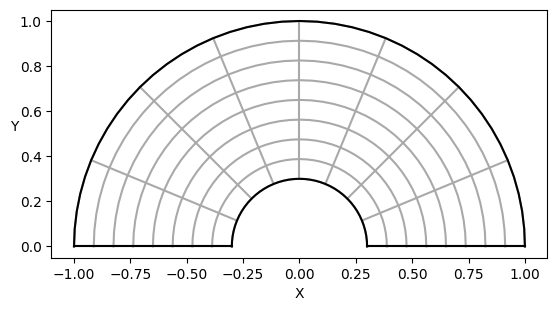


 

for spline polar mapping


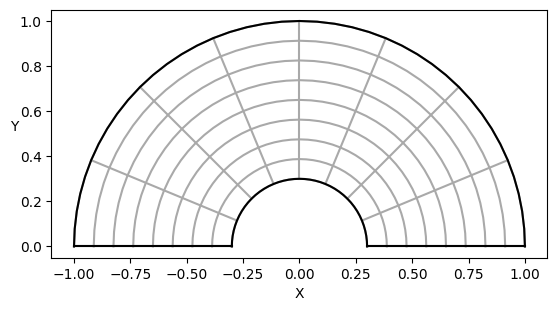

In [25]:
print("for analytical polar mapping")
test_plot_domain_Mapping_heritage(analytical_polar_mapping)
print("\n \n")

print("for spline polar mapping")
test_plot_domain_Mapping_heritage(spline_polar_mapping)